In [87]:
import numpy as np
from matplotlib import pyplot as plt

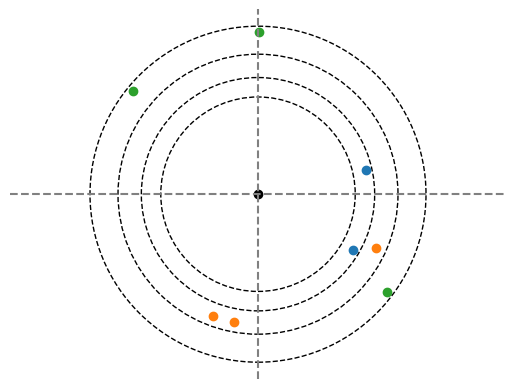

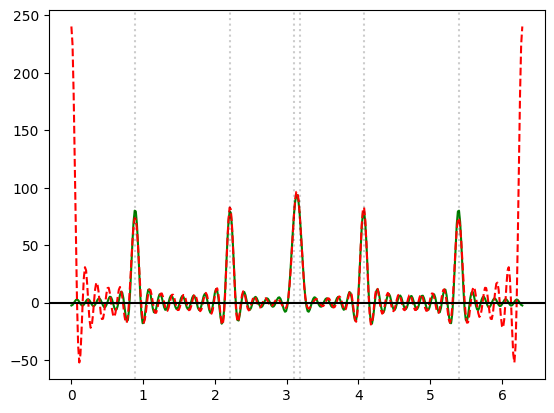

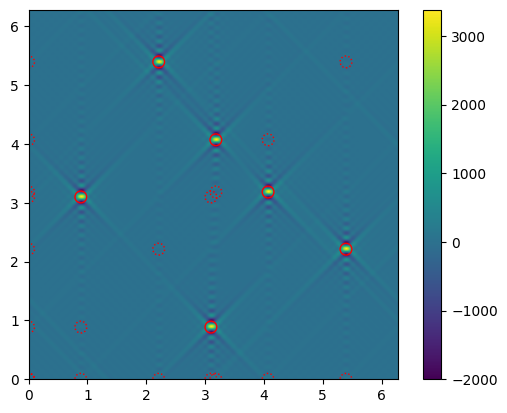

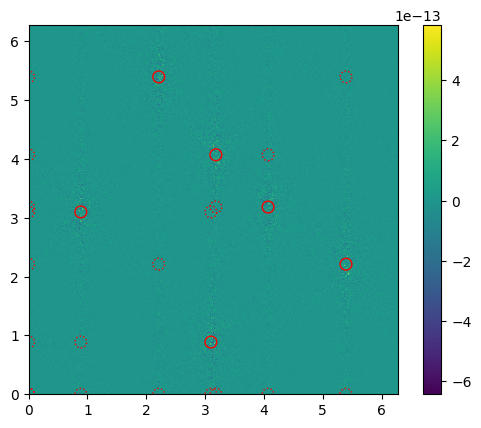

In [88]:
# Setup
phi1_1 = 44.2%(2*np.pi)
phi2_1 = 213.1%(2*np.pi)
phi3_1 = 5234.1%(2*np.pi)
phi1_2 = 41242.4%(2*np.pi)
phi2_2 = 645645.8%(2*np.pi)
phi3_2 = 6524231.5%(2*np.pi)
phi1_3 = 24534565.589%(2*np.pi)
phi2_3 = 754643562.528%(2*np.pi)
phi3_3 = 4564357341.244%(2*np.pi)
nphis = 400
nmax = 40
elb1 = 2
elb2 = 2
elb3 = 2

angles_1 = np.array([phi1_1, phi2_1])
angles_2 = np.array([phi1_2, phi2_2, phi3_2])
angles_3 = np.array([phi1_3, phi2_3, phi3_3])
angles = [angles_1,angles_2,angles_3]

# Plot setup
rcut1 = 3
rcut2 = rcut1*1.2
rcut3 = rcut1*1.2**2
rcut4 = rcut1*1.2**3
plt.plot(0,0,"ko")
plt.gca().add_patch(plt.Circle((0, 0), rcut1, color='r', fill=False,ec="k",ls="--"))
plt.gca().add_patch(plt.Circle((0, 0), rcut2, color='r', fill=False,ec="k",ls="--"))
plt.gca().add_patch(plt.Circle((0, 0), rcut3, color='r', fill=False,ec="k",ls="--"))
plt.gca().add_patch(plt.Circle((0, 0), rcut4, color='r', fill=False,ec="k",ls="--"))
plt.scatter(3.4*np.cos(angles_1),3.4*np.sin(angles_1))
plt.scatter(4*np.cos(angles_2),4*np.sin(angles_2))
plt.scatter(5*np.cos(angles_3),5*np.sin(angles_3))
plt.axhline(0,color="grey",ls="--")
plt.axvline(0,color="grey",ls="--")
plt.axis('equal')
plt.axis('off')
plt.show()

# Third-order
phis = np.linspace(0,2*np.pi,nphis)
res = np.zeros(nphis, dtype=complex)
res_nc = np.zeros(nphis, dtype=complex)
for n in range(-nmax,nmax+1):
    Wn = [np.sum(np.exp(1j*n*angle)) for angle in angles]
    Wnc = [np.sum(np.exp(-1j*n*angle)) for angle in angles]
    Wncorr = [len(angle) for angle in angles]
    res += (Wn[elb1]*Wnc[elb2]-Wncorr[elb1]*(elb1==elb2))*np.exp(-1j*n*phis)
    res_nc += (Wn[elb1]*Wnc[elb2])*np.exp(-1j*n*phis)
    """
    if n>0:
        Wn = [np.sum(np.exp(1j*-n*angle)) for angle in angles]
        Wnc = [np.sum(np.exp(-1j*-n*angle)) for angle in angles]
        res += (Wn[elb1]*Wnc[elb2]-Wncorr[elb1]*(elb1==elb2))*np.exp(-1j*-n*phis)
        res_nc += (Wn[elb1]*Wnc[elb2])*np.exp(-1j*-n*phis)
    """
plt.plot(phis, res.real, "g-")
plt.plot(phis, res_nc.real, "r--")
for el1, ang1 in enumerate(angles[elb1]):
    for el2, ang2 in enumerate(angles[elb2]):
        if ang1!=ang2:
            phi12 = (ang1-ang2)%(2*np.pi)
            #plt.axvline((ang1-ang2), color="k", ls="--",alpha=0.2)
            plt.axvline(phi12, color="k", ls=":",alpha=0.2)
        pass
plt.axhline(0,color="k")
plt.show()

# Fourth-order
phis_1 = np.linspace(0,2*np.pi,nphis)
phis_2 = np.linspace(0,2*np.pi,nphis)
res = np.zeros((nphis, nphis), dtype=complex)
res_nc = np.zeros((nphis, nphis), dtype=complex)
res_corr2 = np.zeros((nphis, nphis), dtype=complex)
res_corr3 = np.zeros((nphis, nphis), dtype=complex)
res_connect = np.zeros((nphis, nphis), dtype=complex)
for n1 in range(-nmax,nmax+1):
    #print(n1)
    for n2 in range(-np.abs(n1),np.abs(n1)+1):
        _ophis = np.outer(np.exp(-1j*n1*phis),np.exp(-1j*n2*phis))
        _ophisc = np.outer(np.exp(-1j*-n1*phis),np.exp(-1j*n2*phis))
        Wn1 = np.sum(np.exp(1j*(n1+n2)*angles[elb1]))
        Wn2 = np.sum(np.exp(1j*(-n1)*angles[elb2]))
        Wn3 = np.sum(np.exp(1j*(-n2)*angles[elb3]))
        W123 = len(angles[elb1])*((elb1==elb2) and (elb1==elb3))
        W12 = np.sum(np.exp(1j*(n2)*angles[elb1]))*((elb1==elb2))
        W23 = np.sum(np.exp(1j*(-n1-n2)*angles[elb2]))*((elb2==elb3))
        W31 = np.sum(np.exp(1j*(n1)*angles[elb3]))*((elb3==elb1))
        thiscorr3 = W123
        thiscorr2 = Wn1*W23 + Wn2*W31 + Wn3*W12 -3*W123
        thiscorr_connect = 0#(Wn1[elb1]*Wn2[elb2]+Wn1[elb1]*Wn3[elb3]+Wn2[elb2]*Wn3[elb3])
        res_base = Wn1*Wn2*Wn3
        res += (res_base-thiscorr3-thiscorr2)*_ophis
        res_nc += res_base*_ophis
        res_corr2 += thiscorr2*_ophis
        res_corr3 += thiscorr3*_ophis
        res_connect += thiscorr_connect*_ophis
        """
        if n1>0:
            Wn1 = np.sum(np.exp(1j*(-n1+n2)*angles[elb1]))
            Wn2 = np.sum(np.exp(1j*(+n1)*angles[elb2]))
            Wn3 = np.sum(np.exp(1j*(-n2)*angles[elb3]))
            W12 = np.sum(np.exp(1j*(n2)*angles[elb1]))*((elb1==elb2))
            W23 = np.sum(np.exp(1j*(+n1-n2)*angles[elb2]))*((elb2==elb3))
            W31 = np.sum(np.exp(1j*(-n1)*angles[elb3]))*((elb3==elb1))
            thiscorr3 = Wncorr3[elb1]*((elb1==elb2) and (elb1==elb3))
            thiscorr2 = Wn1[elb1]*W23 + Wn2[elb2]*W31 + Wn3[elb3]*W12
            thiscorr_connect = 0#(Wn1[elb1]*Wn2[elb2]+Wn1[elb1]*Wn3[elb3]+Wn2[elb2]*Wn3[elb3])*_ophis
            res_base = Wn1[elb1]*Wn2[elb2]*Wn3[elb3]
            res += (res_base-thiscorr3-thiscorr2-thiscorr_connect)*_ophisc
            res_nc += res_base*_ophisc
            res_corr2 += thiscorr2*_ophisc
            res_corr3 += thiscorr3*_ophisc
            res_connect += thiscorr_connect*_ophisc
        """
plt.imshow(res.real,extent=[0,2*np.pi,0,2*np.pi],origin="lower")
plt.colorbar()
for el1, ang1 in enumerate(angles[elb1]):
    for el2, ang2 in enumerate(angles[elb2]):
        phi12 = (ang1-ang2)%(2*np.pi)
        for el3, ang3 in enumerate(angles[elb3]):
            ls = ["-",":"][int((ang1==ang2) or (ang1==ang3) or (ang2==ang3))]
            phi13 = (ang1-ang3)%(2*np.pi)
            plt.gca().add_patch(plt.Circle((phi13, phi12), 0.1, color='r', fill=False, ec="r", ls=ls))
plt.show()

plt.imshow(res.imag,extent=[0,2*np.pi,0,2*np.pi],origin="lower")
plt.colorbar()
for el1, ang1 in enumerate(angles[elb1]):
    for el2, ang2 in enumerate(angles[elb2]):
        phi12 = (ang1-ang2)%(2*np.pi)
        for el3, ang3 in enumerate(angles[elb3]):
            ls = ["-",":"][int((ang1==ang2) or (ang1==ang3) or (ang2==ang3))]
            phi13 = (ang1-ang3)%(2*np.pi)
            plt.gca().add_patch(plt.Circle((phi13, phi12), 0.1, color='r', fill=False, ec="r", ls=ls))
plt.show()

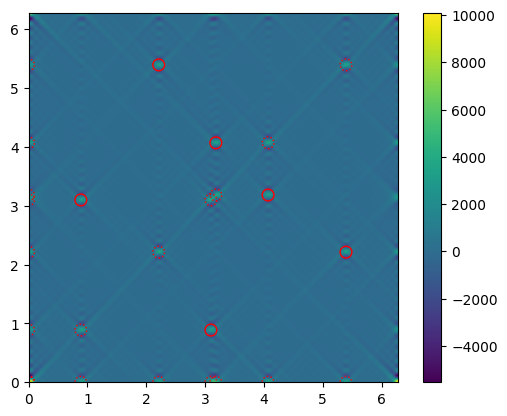

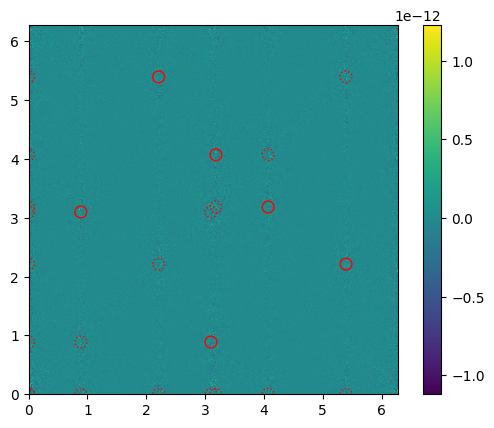

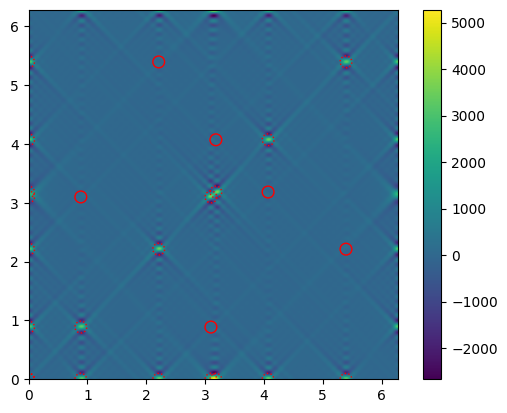

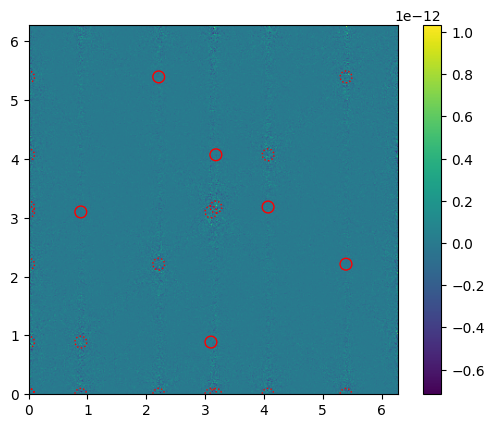

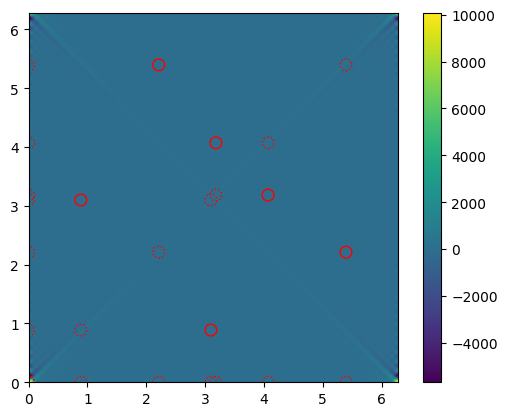

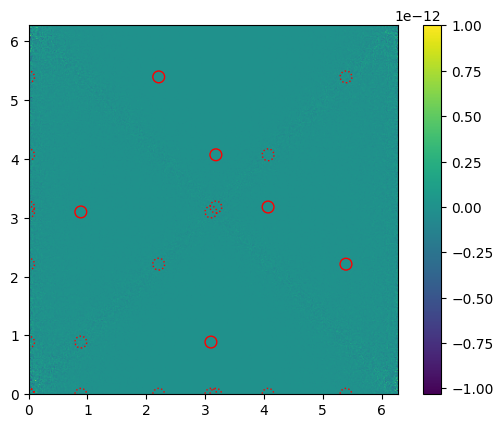

In [89]:
for corr in [res_nc, res_corr2, res_corr3]:
    plt.imshow(corr.real,extent=[0,2*np.pi,0,2*np.pi],origin="lower")
    plt.colorbar()
    for el1, ang1 in enumerate(angles[elb1]):
        for el2, ang2 in enumerate(angles[elb2]):
            phi12 = (ang1-ang2)%(2*np.pi)
            for el3, ang3 in enumerate(angles[elb3]):
                ls = ["-",":"][int((ang1==ang2) or (ang1==ang3) or (ang2==ang3))]
                phi13 = (ang1-ang3)%(2*np.pi)
                plt.gca().add_patch(plt.Circle((phi13, phi12), 0.1, color='r', fill=False, ec="r", ls=ls))
    plt.show()
    plt.imshow(corr.imag,extent=[0,2*np.pi,0,2*np.pi],origin="lower")
    plt.colorbar()
    for el1, ang1 in enumerate(angles[elb1]):
        for el2, ang2 in enumerate(angles[elb2]):
            phi12 = (ang1-ang2)%(2*np.pi)
            for el3, ang3 in enumerate(angles[elb3]):
                ls = ["-",":"][int((ang1==ang2) or (ang1==ang3) or (ang2==ang3))]
                phi13 = (ang1-ang3)%(2*np.pi)
                plt.gca().add_patch(plt.Circle((phi13, phi12), 0.1, color='r', fill=False,ec="r",ls=ls))
                #plt.plot(ypix,xpix,marker="o",color="r",ms=10,markerfacecolor='none')
    plt.show()

In [39]:
from scipy.spatial import cKDTree

In [70]:
xs = np.random.rand(10000)
ys = np.random.rand(10000)
tree = cKDTree([xs,ys])

In [71]:
tree.

2

In [79]:
nresos = 3
1 + (nresos*(nresos+1)*(2*nresos+1)*(3*nresos*nresos+3*nresos-1))/30

99.0

In [85]:
for nresos in range(10):
    npix_in_hashpix_noreduced = 0;
    nextnpix_in_hashpix_noreduced = 1;
    for elreso in range(nresos):
        npix_in_hashpix_noreduced += nextnpix_in_hashpix_noreduced;
        nextnpix_in_hashpix_noreduced *= 4;
    print(npix_in_hashpix_noreduced)

0
1
5
21
85
341
1365
5461
21845
87381


In [83]:
npix_in_hashpix_noreduced

85